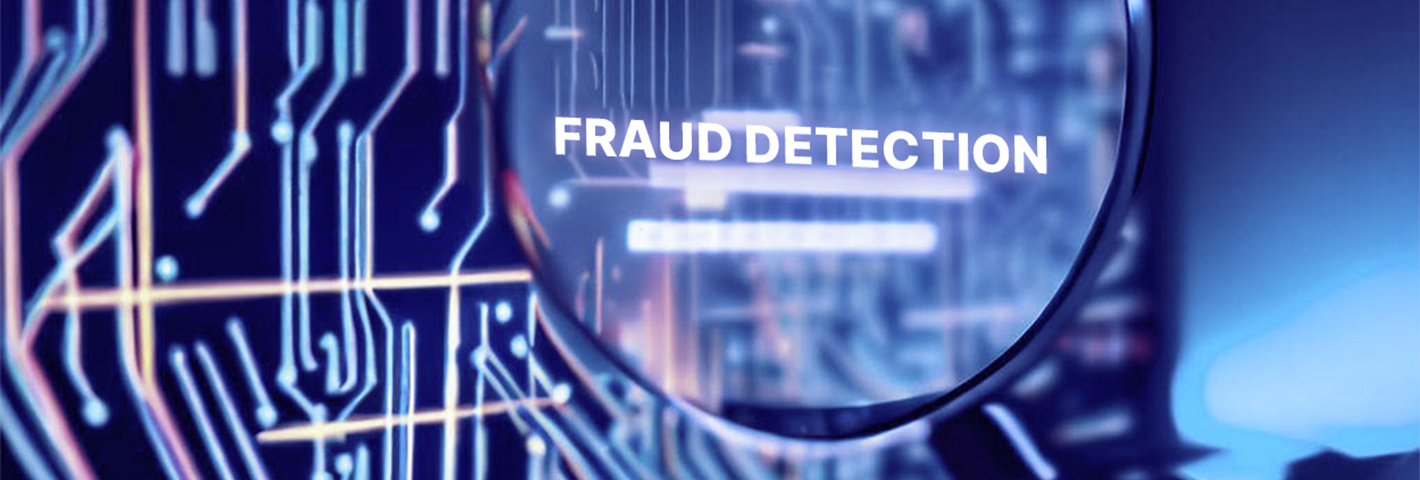

### **PROBLEM STATEMENT**

---
The dataset consists of various features related to **transactions**, **connections**, and **user interactions**. The goal is to develop a predictive model to identify fraudulent transactions based on the provided information. The **'Fraud'** column serves as the target variable, indicating whether a transaction is **fraudulent or not**.

### **DATA DICTIONARY**
1. Transctionkey :- Unique identifier of each transcation.
2. ConnectionRegion :- Region from which transcation is established.
3.  V1CF, V2CF, V3CF, V4CF, V5CF, V6CF : Categorical variables with unspecified meaning.
8. TimeZone:-TimeZone at which the transcation is established.
9. AreaCode:- Code of the area from the transcation is established.
10. ConnectionOrg:- Organization related to the connection.
11. ConnectionType:- Type of connection used for the transaction.
12. ConnectionSpeed: Speed of the connection.
13. Channel : Channel through which the transaction was conducted.
14. TransactionDateTime : Date and time of the transaction.
15. AddressUpdateDate, EmailUpdateDate : Dates when address and email information were last updated.
12.  webSessOS, webSessWebBrowser :- Operating system and web browser information from the web session.
13. LastLong,Lastlat,CurrrentLong,CurrentLat:-longitude and latitude of the current and last locations.
14. IsOldDevice:-device used to perform transcation is new or old.
15.  WebSessionRetail, MainEntityUse: Information related to web session and main entity usage.
16. Fraud : Indicates whether the transaction is flagged as fraudulent.(Target Variable)

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/ML/Data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/ML/Data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import(
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

import seaborn as sns
#to impute missing calues
from sklearn.impute import KNNImputer

#To build a logistic Regression model
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the Csv file
my_df=pd.read_csv("MyBank.csv")

In [ ]:
#Creating an copy of our orignal DataFrame
df=my_df.copy()
df.head()

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
0,16758,south central@texas@us,99,98,10,803,19820,-5.0,602.0,013 netvision fix ip users,...,Mac OS X,Chrome,-108.5530,NaN,9.4400,NaN,0.0,0.0,NaN,0
1,8912,northeast@new york@us,99,94,61,602,16980,-4.0,512.0,013 netvision fix ip users,...,Windows 7,Edge,-121.8382,27.9860,-112.0826,33.7985,0.0,0.0,315.0,0
2,92186,mid atlantic@new jersey@us,76,95,66,505,35620,-6.0,407.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-74.0734,33.7985,-80.3120,32.8494,1.0,NaN,333.0,0
3,12924,south central@arkansas@us,99,23,50,0,35620,-5.0,202.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-88.1029,27.9860,-84.3883,42.1530,1.0,0.0,327.0,0
4,125650,mid atlantic@new jersey@us,99,74,80,602,19100,-8.0,313.0,013 netvision fix ip users,...,Windows 7,Chrome,-58.5244,34.9497,-111.3270,34.0476,1.0,0.0,394.0,0


### **Checking Shape**

In [ ]:
df.shape

(138752, 27)

### **Checking Size**

In [ ]:
df.size

3746304

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionKey       138752 non-null  int64  
 1   ConnectionRegion     138752 non-null  object 
 2   V1CF                 138752 non-null  int64  
 3   V2CF                 138752 non-null  int64  
 4   V3CF                 138752 non-null  int64  
 5   V4CF                 138752 non-null  int64  
 6   V5CF                 138752 non-null  int64  
 7   TimeZone             138752 non-null  float64
 8   AreaCode             138740 non-null  float64
 9   ConnectionOrg        138752 non-null  object 
 10  ConnectionType       138752 non-null  object 
 11  ConnectionSpeed      138752 non-null  object 
 12  V6CF                 138752 non-null  object 
 13  channel              138752 non-null  object 
 14  TransactionDateTime  138752 non-null  object 
 15  AddressUpdateDate

### **Observation**
- we have Total of 16 numerical columns
- we have 11 object columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionKey,138752.0,69376.500000,40054.396613,1.0000,34688.7500,69376.5000,104064.2500,138752.0000
V1CF,138752.0,95.532252,8.171424,40.0000,99.0000,99.0000,99.0000,99.0000
V2CF,138752.0,78.871541,25.561483,0.0000,80.0000,88.0000,95.0000,99.0000
V3CF,138752.0,69.438386,23.239424,0.0000,66.0000,77.0000,80.0000,99.0000
V4CF,138752.0,600.997341,173.488234,0.0000,505.0000,602.0000,753.0000,881.0000
V5CF,138752.0,27842.709438,11612.998102,0.0000,16980.0000,31100.0000,35620.0000,49780.0000
TimeZone,138752.0,-5.810414,5.766666,-10.0000,-7.0000,-6.0000,-5.0000,999.0000
AreaCode,138740.0,494.512332,263.428397,0.0000,305.0000,415.0000,713.0000,979.0000
LastLong,114363.0,-89.669418,29.563767,-175.2000,-112.0826,-87.6712,-77.8786,178.4589
LastLat,114521.0,36.763389,7.229397,-43.5321,33.6903,38.9520,41.0741,65.0000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
ConnectionRegion,138752,500,southwest@california@us,26098
ConnectionOrg,138752,7620,time warner cable internet llc,15676
ConnectionType,138752,11,cable,70047
ConnectionSpeed,138752,4,medium,92827
V6CF,138752,231,net,74018
channel,138752,4,SOA,71956
TransactionDateTime,138752,82445,31/05/2013 12:21:33:000,11
AddressUpdateDate,138752,66794,20/01/2004 03:26:16:000,9820
EmailUpdateDate,138752,66917,20/01/2004 02:45:44:000,6289
webSessOS,138752,20,Windows 10,36042


In [ ]:
# Code to check the unique Value of columns in our dataset
def unique_value(df):
  for col in df.columns:
    print(f"{col}:{df[col].unique()}")
    print("-"*60)


In [ ]:
unique_value(df)

TransactionKey:[ 16758   8912  92186 ...  70441 127115  40331]
------------------------------------------------------------
ConnectionRegion:['south central@texas@us' 'northeast@new york@us'
 'mid atlantic@new jersey@us' 'south central@arkansas@us'
 'southeast@north carolina@us' 'great lakes@illinois@us'
 'southwest@california@us' 'south central@louisiana@us'
 'southeast@florida@us' 'mid atlantic@district of columbia@us'
 'great lakes@ohio@us' 'northeast@massachusetts@us'
 'mountain@new mexico@us' 'southeast@georgia@us'
 'unknown@distrito capital@ve' 'london@greater london@gb'
 'southwest@arizona@us' 'midwest@indiana@us' 'mid atlantic@virginia@us'
 'unknown@michoacan de ocampo@mx' 'great lakes@michigan@us'
 'unknown@guatemala@gt' 'cagayan valley@isabela@ph'
 'southeast@mississippi@us' 'mountain@utah@us' 'south central@missouri@us'
 'unknown@distrito nacional@do' 'mountain@colorado@us'
 'great lakes@wisconsin@us' 'unknown@baden-wuerttemberg@de'
 'pacific northwest@washington@us' 'mid at

In [ ]:
# code to check the count of unique value in our dataset
def nunique_value(df):
  for col in df.columns:
    print(f"{col}:{df[col].nunique()}")
    print("-"*30)


In [ ]:
nunique_value(df)

TransactionKey:138752
------------------------------
ConnectionRegion:500
------------------------------
V1CF:9
------------------------------
V2CF:29
------------------------------
V3CF:23
------------------------------
V4CF:207
------------------------------
V5CF:582
------------------------------
TimeZone:27
------------------------------
AreaCode:243
------------------------------
ConnectionOrg:7620
------------------------------
ConnectionType:11
------------------------------
ConnectionSpeed:4
------------------------------
V6CF:231
------------------------------
channel:4
------------------------------
TransactionDateTime:82445
------------------------------
AddressUpdateDate:66794
------------------------------
EmailUpdateDate:66917
------------------------------
webSessOS:20
------------------------------
webSessWebBrowser:23
------------------------------
LastLong:3160
------------------------------
LastLat:3117
------------------------------
CurrentLong:3603
----------------

###**HANDLING MISSING DATA IN CATEGORICAL COLUMNS**
**Spliting Column ConnectionRegion**

In [ ]:
#spliting connectionRegion
df[['Region', 'State', 'Country']] = df["ConnectionRegion"].apply(lambda x: pd.Series(x.split('@')))


In [ ]:
df['Region'] = df['Region'].str.replace('\s', '',regex=True)

**Dropping ConnectionRegion**

In [ ]:
df.drop("ConnectionRegion",axis=1,inplace=True)

In [ ]:
col=['TransactionKey','Region',
       'State', 'Country', 'V1CF', 'V2CF', 'V3CF', 'V4CF',
       'V5CF', 'TimeZone', 'AreaCode', 'ConnectionOrg', 'ConnectionType',
       'ConnectionSpeed', 'V6CF', 'channel', 'TransactionDateTime',
       'AddressUpdateDate', 'EmailUpdateDate', 'webSessOS',
       'webSessWebBrowser', 'LastLong', 'LastLat', 'CurrentLong', 'CurrentLat',
       'IsOldDevice', 'WebSessionRetail', 'MainEntityUse', 'Fraud']
df=df[col]

In [ ]:
df.Region.unique()

array(['southcentral', 'northeast', 'midatlantic', 'southeast',
       'greatlakes', 'southwest', 'mountain', 'unknown', 'london',
       'midwest', 'cagayanvalley', 'pacificnorthwest',
       'yorkshireandthehumber', 'eastmidlands', 'campania',
       'eastofengland', 'south', 'comunidaddemadrid', 'scotland',
       'attiki', 'auvergne-rhone-alpes', 'catalunya', 'ile-de-france',
       'vlaamsgewest', 'jawa', 'leinster', 'northwest',
       'nationalcapitalregion', "provence-alpes-coted'azur",
       'southisland', 'tsentralnyfederalnyokrug', 'lombardia', 'pacific',
       'centre-valdeloire', 'regionwallonne', 'galicia', 'toscana',
       'veneto', 'regiondebruxelles-capitale', 'northisland',
       'trentino-altoadige', 'lazio', 'bretagne',
       'severo-zapadnyfederalnyokrug', 'occitanie', 'sicilia', 'munster',
       'makedoniakaithraki', 'sumatera', 'piemonte', "valled'aosta",
       'hauts-de-france', 'sibirskyfederalnyokrug', 'normandie',
       'basnahirapalata', 'westmidland

In [ ]:
import collections
collections.Counter(df["State"]=="none")

Counter({False: 138484, True: 268})

In [ ]:
df.isnull().sum()

TransactionKey             0
Region                     0
State                      0
Country                    0
V1CF                       0
V2CF                       0
V3CF                       0
V4CF                       0
V5CF                       0
TimeZone                   0
AreaCode                  12
ConnectionOrg              0
ConnectionType             0
ConnectionSpeed            0
V6CF                       0
channel                    0
TransactionDateTime        0
AddressUpdateDate          0
EmailUpdateDate            0
webSessOS                  0
webSessWebBrowser          0
LastLong               24389
LastLat                24231
CurrentLong                0
CurrentLat             24379
IsOldDevice             4070
WebSessionRetail        4038
MainEntityUse           4080
Fraud                      0
dtype: int64

**OBSERVATION**

- In our Data set we have many missing or NAN Values.
  - Columns
     - Region - 4782 missing values
     - States - 86 missing values
     - AreaCode - 12 missing values
     - ConnectionOrg - 27 missing values
     - ConnectionType - 4947 missing values
     - ConnectionSpeed - 5004 missing values
     - V6CF - 17335 missing values
     - Area code - 12 missing values
     - LastLong  - 24389 missing values
     - LastLat   - 24231 missing values
     - CurrentLat - 24379 missing values
     - IsOldDevice - 4070 missing values
     - WebSessionRetail - 4038 missing values
     - MainEntityUse - 4080 missing values

Total of these missing values is :- **117419** Values
it is very necessary to handle this missing values.


## **AreaCode**

<b>Filling missing values in the 'AreaCode' column with 0 rather than mode  makes sense as it indicates the absence of a specific area code and maintains data consistency.<b>

In [ ]:
df["AreaCode"]=df["AreaCode"].fillna(0)

##**States**

In [ ]:
df["State"].replace("unknown",np.nan,inplace=True)
df["State"].replace("none",np.nan,inplace=True)
print(df["State"].mode())
df["State"]=df["State"].fillna("california")

0    california
Name: State, dtype: object


## **Region**

In [ ]:
df["Region"].replace("none",np.nan,inplace=True)
df["Region"].replace("unknown",np.nan,inplace=True)
print(df["Region"].mode())
df["Region"]=df["Region"].fillna("southwest")

0    southwest
Name: Region, dtype: object


## **ConnectionSpeed**

In [ ]:
# Count occurrences of 'unknown' in the 'ConnectionSpeed' column
unknown_count = df['ConnectionSpeed'].value_counts().get('unknown', 0)

# Print the count
print("Occurrences of 'unknown' in 'ConnectionSpeed' column:", unknown_count)


Occurrences of 'unknown' in 'ConnectionSpeed' column: 5004


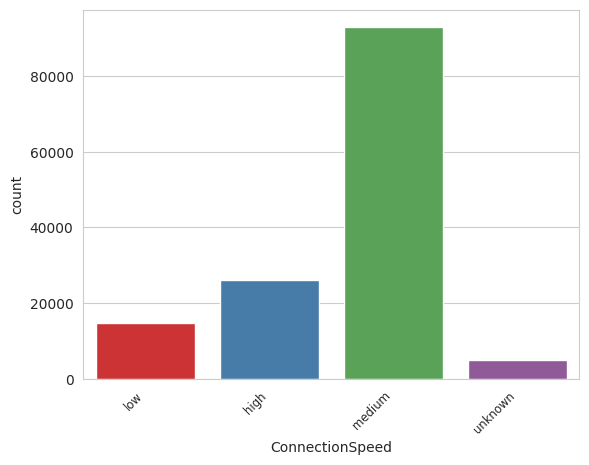

In [ ]:
plot=sns.countplot(df,x="ConnectionSpeed",palette = "Set1")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'small')

## **ConnectionChannel**

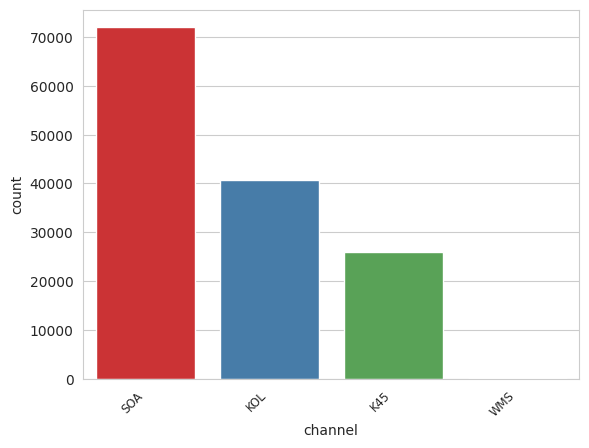

In [ ]:
plot=sns.countplot(df,x="channel",palette = "Set1")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'small')

## **ConnectionOrg**

In [ ]:
# Check unique values in the 'ConnectionOrg' column
unique_values = df['ConnectionOrg'].unique()

# Print the unique values
print("Unique values in 'ConnectionOrg' column:")
for value in unique_values:
    print(value)


Streaming output truncated to the last 5000 lines.
foods midwest
foods peer
foothill-deanza community college district
foothills rural telephone cooperative corporation  inc.
for abc igw
for residential cable and xdsl subscribers
forbes media
forcepoint cloud india
ford foundation
ford motor company
fordham university
foresee results
foresite management  inc
forest hill med rlty
forest laboratories  inc.
forest park school district no. 91
forethought.net
forever 21
forex capital markets l.l.c.
forlaget systime
formatix corp
former zao mtu-intel
forsythe data centers
forsythe data centers inc.
forsythe technology inc
fort bend independent school dist.
forterra
fortis clearing chicago llc
fortress investment group llc
fortune fish
fortune international ltd.
fossil industries
four points by sheraton
four seasons design  inc.
fox entertainment group  inc.
fox news channel
fox valley internet
fox vending inc
foxconn corporation
fpg jpm texas management and owner c/o fortis property group
fp

In [ ]:
# Sort the index
df.sort_index(inplace=True)

# Keep only the first characters before space in the 'ConnectionOrg' column
df['ConnectionOrg'] = df['ConnectionOrg'].str.split().str[0]


In [ ]:
# Count the total number of unique values in the 'ConnectionOrg' column
total_unique_count = df['ConnectionOrg'].nunique()

# Print the total count
print("Total unique values in 'ConnectionOrg' column after modification:", total_unique_count)

Total unique values in 'ConnectionOrg' column after modification: 5026


In [ ]:
# Check unique values in the 'ConnectionOrg' column
unique_values = df['ConnectionOrg'].unique()

# Print the unique values
print("Unique values in 'ConnectionOrg' column:")
for value in unique_values:
    print(value)

Unique values in 'ConnectionOrg' column:
0.015151515151515152
0.0
0.08333333333333333
0.3333333333333333
0.5
0.03125
1.0
0.010752688172043012
0.028985507246376812
0.018867924528301886
0.25
0.1111111111111111
0.2
0.125
0.16666666666666666
0.037037037037037035
0.10204081632653061
0.058823529411764705
0.05555555555555555
0.06666666666666667
0.07692307692307693
0.04477611940298507
0.041666666666666664
0.010869565217391304
0.06976744186046512
0.02702702702702703
0.057692307692307696
0.020833333333333332
0.03571428571428571
0.029069767441860465
0.03333333333333333
0.4
0.05128205128205128
0.1
0.022222222222222223
0.030303030303030304
0.18181818181818182
0.013888888888888888
0.049723756906077346
0.06382978723404255
0.07142857142857142
0.03896103896103896
0.04
0.14285714285714285
0.02857142857142857
0.043478260869565216
0.03225806451612903
0.6666666666666666
0.014760147601476014
0.02127659574468085
0.030534351145038167
0.0625
0.031598513011152414
0.02564102564102564
0.02608695652173913
0.045454

## **ConnectionType**

In [ ]:
print(df.ConnectionType.unique())

['cable' 'dsl' 'tx' 'mobile wireless' 'unknown' 'ocx' 'isdn'
 'fixed wireless' 'consumer satellite' 'dialup' 'framerelay']


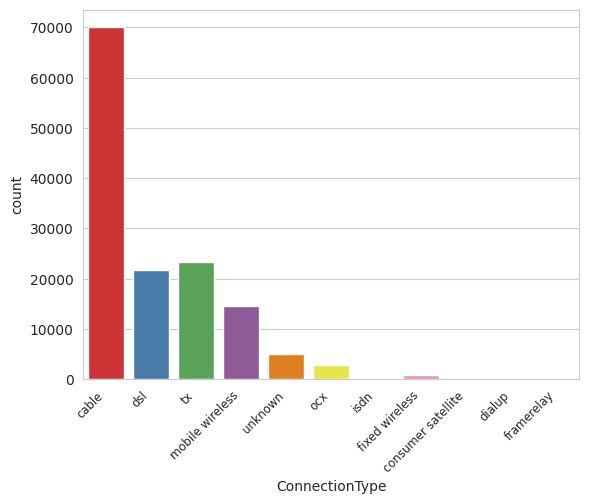

In [ ]:
plot=sns.countplot(df,x="ConnectionType",palette = "Set1")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()
# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'small')

## **WebSessOS**

['Mac OS X' 'Windows 7' 'Windows 10' 'iOS' 'Windows Vista' 'Android'
 'Windows 8.1' 'Chrome OS' 'BlackBerry OS' 'Ubuntu' 'Linux' 'Windows XP'
 'Fedora' 'Windows 8' 'Windows RT 8.1' 'Windows Phone' 'BREW' 'Windows RT'
 'FreeBSD' 'Windows NT 4.0']
['Mac OS X' 'Windows' 'iOS' 'Android' 'Chrome OS' 'BlackBerry OS' 'Ubuntu'
 'Linux' 'Fedora' 'BREW' 'FreeBSD']


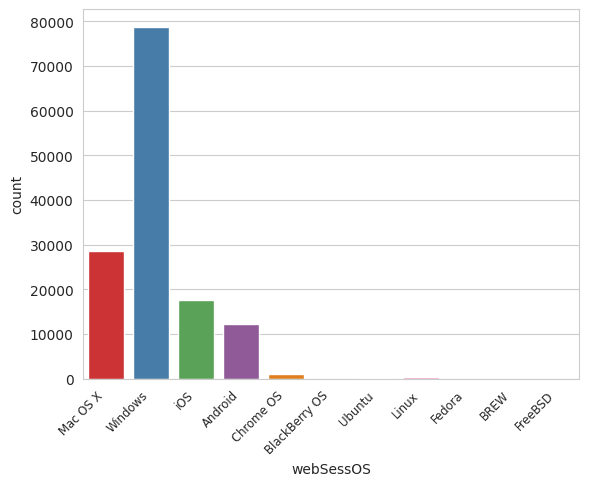

In [ ]:
print(df.webSessOS.unique())
# Define a function to simplify the OS names
def simplify_os(os):
    if 'Windows' in os:
        return 'Windows'
    else:
        return os

# Apply the function to the 'webSessOS' column
df['webSessOS'] = df['webSessOS'].apply(simplify_os)

# Check unique values again
unique_values = df['webSessOS'].unique()
print(unique_values)
plot=sns.countplot(df,x="webSessOS",palette = "Set1")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'small')

## **webSessWebBrowser**

['Chrome' 'Edge' 'Mobile Safari' 'Firefox' 'Safari' 'IE' 'Chrome Mobile'
 'Sogou Explorer' 'IE Mobile' 'Amazon Silk' 'Chrome Mobile iOS'
 'Firefox Mobile' 'Vivaldi' 'Opera' 'BlackBerry WebKit' 'Android'
 'QQ Browser' 'UC Browser' 'Yandex Browser' 'Chromium' 'Opera Mini'
 'Opera Mobile' 'Puffin']
['Chrome' 'Edge' 'Mobile' 'Firefox' 'Safari' 'IE' 'Sogou' 'Amazon'
 'Vivaldi' 'Opera' 'BlackBerry' 'Android' 'QQ' 'UC' 'Yandex' 'Chromium'
 'Puffin']


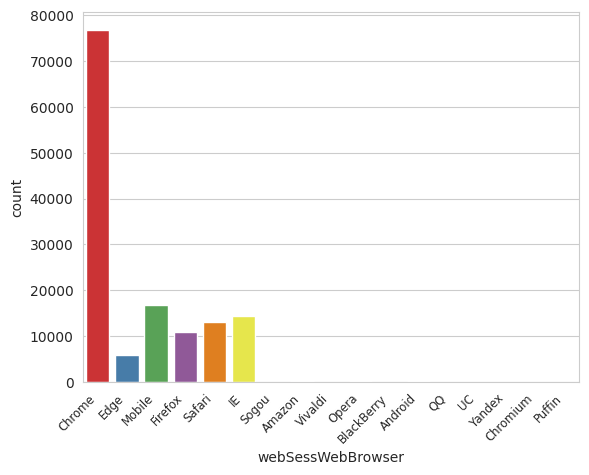

In [ ]:
print(df.webSessWebBrowser.unique())
# Split each string in the 'webSessWebBrowser' column by space and keep only the first part
df['webSessWebBrowser'] = df['webSessWebBrowser'].apply(lambda x: x.split()[0])

# Check unique values again
unique_values = df['webSessWebBrowser'].unique()
print(unique_values)

plot=sns.countplot(df,x="webSessWebBrowser",palette = "Set1")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'small')

## **V6CF**

In [ ]:
# Replacing the Unknown Value present in our Dataset with NAN(not a number)
df["V6CF"].replace("unknown",np.nan,inplace=True)
print(df["V6CF"].mode())
df["V6CF"]=df["V6CF"].fillna("net")
'''# Define a lambda function to replace values
replace_func5 = lambda x: 'Generic Top-Level Domains' if x in ['com', 'net', 'org', 'edu', 'gov', 'mil', 'info', 'biz', 'coop', 'io', 'eu', 'name', 'pro', 'mobi', 'aero', 'museum', 'travel', 'jobs', 'cat', 'tel', 'int', 'xxx', 'post', 'asia', 'xxx', 'post', 'asia', 'tel', 'int', 'cat', 'jobs', 'travel', 'museum', 'aero', 'mobi', 'pro', 'name', 'eu', 'io', 'coop', 'biz', 'info', 'mil', 'gov', 'edu', 'org', 'net', 'com'
] else 'Country Code Top-Level Domains' if x in ['us', 'de', 'fr', 'ca', 'co.uk', 'com.ar', 'net.il', 'in', 'net.do', 'com.au', 'com.ve', 'ne.jp', 'co.th', 'ru', 'gr', 'ch', 'il.us', 'tx.us', 'oh.us', 'pl', 'nl', 'net.ar', 'fl.us', 'net.br', 'cl', 'be', 'pt', 'ec', 'co.cr', 'ny.us', 'com.tr', 'net.au', 'nj.us', 'net.uy', 'ga.us', 'net.sg', 'in.us', 'mi.us', 'hn', 'jp', 'com.sg', 'io', 'gt', 'co.za', 'ro', 'hu', 'la.us', 'com.ec', 'net.id', 'co.nz', 'net.my', 'fi', 'or.us', 'ws', 'la', 'cn', 'ac.uk', 'net.ni', 'cz', 'co.us', 'es', 've', 'rs', 'com.gh', 'jo', 'at', 'com.qa', 'co.zw', 'net.ua', 'ky.us', 'me', 'sx', 'vn', 'vi', 'lu', 'md.us', 'hr', 'com.hk', 'nv.us', 'net.uk', 'net.pl', 'net.tw', 'co', 'am', 'al', 'com.ni', 'se', 'edu.hk', 'mx', 'bo', 'cr', 'md', 'com.tw', 'gy', 'net.in',
] else 'Other Domainss'

# Apply the lambda function to the
df['V6CF'] = df['V6CF'].apply(replace_func5)
plot=sns.countplot(df,x="V6CF",palette = "Set1")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'small')'''
number_counts = {}
for value in df['V6CF'].unique():
    # Check if the value is a number string
    if str(value).isdigit():
        # Increment the count in the dictionary
        number_counts[value] = df['V6CF'].value_counts().get(value, 0)

# Print the counts of number strings
print("Counts of number strings in 'V6CF' column:")
for number, count in number_counts.items():
    print(f"{number}: {count}")
# Find the mode (most frequent value) of the 'V6CF' column
mode_value = df['V6CF'].mode()[0]

# Replace all number strings with the mode value in the 'V6CF' column
df.loc[df['V6CF'].str.isdigit(), 'V6CF'] = mode_value

# count of Unique values in V6CF column
unique_values = df['V6CF'].nunique()
unique_values

0    net
Name: V6CF, dtype: object
Counts of number strings in 'V6CF' column:
225: 3
65: 2
63: 7
14: 2
192: 2
80: 3


224

## **TransactionDateTime**

In [ ]:
from datetime import datetime as dt
df["TransactionDateTime"] = pd.to_datetime(df["TransactionDateTime"],format='%d/%m/%Y %H:%M:%S:%f',errors='coerce')
df['TransactionDateTime'] = df['TransactionDateTime'].fillna(df['TransactionDateTime'].mode().iloc[0])
# Extracting relevant features from TransactionDateTime
df['TransactionDay'] = df['TransactionDateTime'].dt.day
df["Transcactionyear"]=df['TransactionDateTime'].dt.year
df["TranscactionMonth"]=df['TransactionDateTime'].dt.month
df['TransactionHour'] = df['TransactionDateTime'].dt.hour
df['TransactionMinute'] = df['TransactionDateTime'].dt.minute
df['TransactionSecond'] = df['TransactionDateTime'].dt.second

## **AddressUpdateDate**

In [ ]:
from datetime import datetime
df['AddressUpdateDate'] = pd.to_datetime(df['AddressUpdateDate'],format='%d/%m/%Y %H:%M:%S:%f',errors='coerce')
df['AddressUpdateDate'] = df['AddressUpdateDate'].fillna(df['AddressUpdateDate'].mode().iloc[0])

df['AddressTransDiff'] = (df["TransactionDateTime"] - df['AddressUpdateDate']).dt.days


## **EmailUpdateDate**

In [ ]:
df["EmailUpdateDate"] = pd.to_datetime(df["EmailUpdateDate"],format='%d/%m/%Y %H:%M:%S:%f',errors='coerce')
df['EmailUpdateDate'] = df['EmailUpdateDate'].fillna(df['EmailUpdateDate'].mode().iloc[0])
df["timediff"]=(df["TransactionDateTime"] - df['EmailUpdateDate']).dt.days


In [ ]:
# Drop the original three columns
df.drop(columns=['TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate'], inplace=True)

## **IsOldDevice**

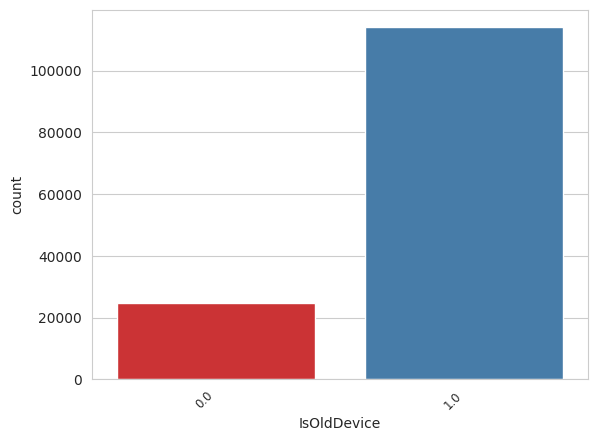

In [ ]:
df["IsOldDevice"]=df["IsOldDevice"].fillna(1)
plot=sns.countplot(df,x="IsOldDevice",palette = "Set1")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 'small')

## **MainEntityUse**

In [ ]:
df["MainEntityUse"]=df["MainEntityUse"].fillna(df["MainEntityUse"].median())

## **Fraud**

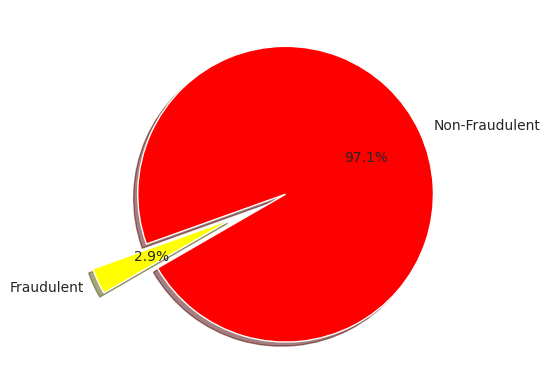

In [ ]:
sizes = [df.Fraud.value_counts()[0], df.Fraud.value_counts()[1]]
explode = (0,0.4) #explode the second slice i.e. fraudulent transaction
plt.pie(sizes, explode=explode, labels=['Non-Fraudulent', 'Fraudulent'], colors=['Red', 'Yellow'], autopct='%1.1f%%', shadow=True, startangle=210)
plt.show()

<font color='blue'><b>Bivariate Analysis of Object Columns and Fraud</b></font>
<b>

Visualizing the distribution of object columns and their relationship with the target variable "Fraud" using bar plots

<Figure size 1000x600 with 0 Axes>

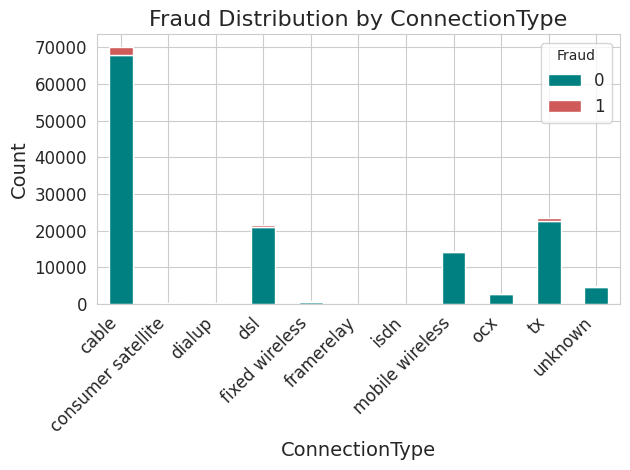

<Figure size 1000x600 with 0 Axes>

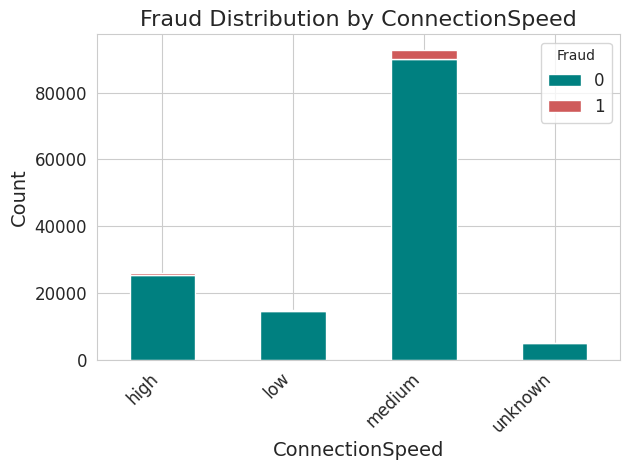

<Figure size 1000x600 with 0 Axes>

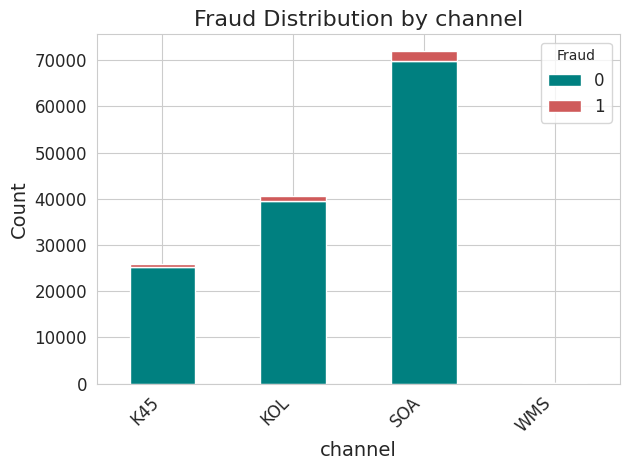

<Figure size 1000x600 with 0 Axes>

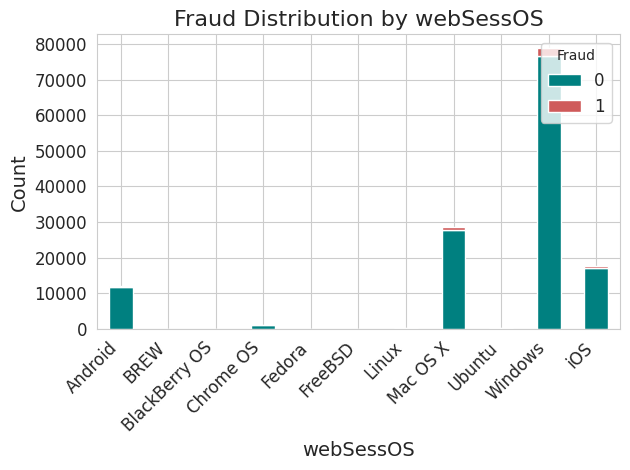

<Figure size 1000x600 with 0 Axes>

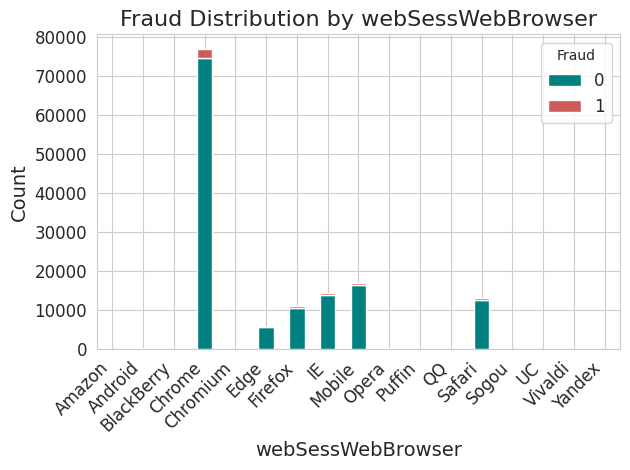

In [ ]:
# Convert the 'Fraud' column to categorical
df['Fraud'] = df['Fraud'].astype('category')

# Select all object columns excluding specified ones
excluded_columns = ['ConnectionOrg', 'V6CF','Country','Region','State']
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in excluded_columns]

# Set style
sns.set_style("whitegrid")

# Loop through each remaining object column
for object_column in object_columns:
    # Count the occurrences of each category with respect to Fraud
    fraud_counts = df.groupby([object_column, 'Fraud']).size().unstack(fill_value=0)

    # Plot the relationship between the object column and the target column (Fraud)
    plt.figure(figsize=(10, 6))
    fraud_counts.plot(kind='bar', stacked=True, color=['#008080','#CF5A5A'])
    plt.title('Fraud Distribution by ' + object_column, fontsize=16)
    plt.xlabel(object_column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Fraud', loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
df.columns

Index(['TransactionKey', 'Region', 'State', 'Country', 'V1CF', 'V2CF', 'V3CF',
       'V4CF', 'V5CF', 'TimeZone', 'AreaCode', 'ConnectionOrg',
       'ConnectionType', 'ConnectionSpeed', 'V6CF', 'channel', 'webSessOS',
       'webSessWebBrowser', 'LastLong', 'LastLat', 'CurrentLong', 'CurrentLat',
       'IsOldDevice', 'WebSessionRetail', 'MainEntityUse', 'Fraud',
       'TransactionDay', 'Transcactionyear', 'TranscactionMonth',
       'TransactionHour', 'TransactionMinute', 'TransactionSecond',
       'AddressTransDiff', 'timediff'],
      dtype='object')

In [ ]:
df.isnull().sum()

TransactionKey           0
Region                   0
State                    0
Country                  0
V1CF                     0
V2CF                     0
V3CF                     0
V4CF                     0
V5CF                     0
TimeZone                 0
AreaCode                 0
ConnectionOrg            0
ConnectionType           0
ConnectionSpeed          0
V6CF                     0
channel                  0
webSessOS                0
webSessWebBrowser        0
LastLong             24389
LastLat              24231
CurrentLong              0
CurrentLat           24379
IsOldDevice              0
WebSessionRetail      4038
MainEntityUse            0
Fraud                    0
TransactionDay           0
Transcactionyear         0
TranscactionMonth        0
TransactionHour          0
TransactionMinute        0
TransactionSecond        0
AddressTransDiff         0
timediff                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   TransactionKey     138752 non-null  int64   
 1   Region             138752 non-null  object  
 2   State              138752 non-null  object  
 3   Country            138752 non-null  object  
 4   V1CF               138752 non-null  int64   
 5   V2CF               138752 non-null  int64   
 6   V3CF               138752 non-null  int64   
 7   V4CF               138752 non-null  int64   
 8   V5CF               138752 non-null  int64   
 9   TimeZone           138752 non-null  float64 
 10  AreaCode           138752 non-null  float64 
 11  ConnectionOrg      138752 non-null  object  
 12  ConnectionType     138752 non-null  object  
 13  ConnectionSpeed    138752 non-null  object  
 14  V6CF               138752 non-null  object  
 15  channel            138752 non-null

In [ ]:
df.isnull().sum()

TransactionKey           0
Region                   0
State                    0
Country                  0
V1CF                     0
V2CF                     0
V3CF                     0
V4CF                     0
V5CF                     0
TimeZone                 0
AreaCode                 0
ConnectionOrg            0
ConnectionType           0
ConnectionSpeed          0
V6CF                     0
channel                  0
webSessOS                0
webSessWebBrowser        0
LastLong             24389
LastLat              24231
CurrentLong              0
CurrentLat           24379
IsOldDevice              0
WebSessionRetail      4038
MainEntityUse            0
Fraud                    0
TransactionDay           0
Transcactionyear         0
TranscactionMonth        0
TransactionHour          0
TransactionMinute        0
TransactionSecond        0
AddressTransDiff         0
timediff                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   TransactionKey     138752 non-null  int64   
 1   Region             138752 non-null  object  
 2   State              138752 non-null  object  
 3   Country            138752 non-null  object  
 4   V1CF               138752 non-null  int64   
 5   V2CF               138752 non-null  int64   
 6   V3CF               138752 non-null  int64   
 7   V4CF               138752 non-null  int64   
 8   V5CF               138752 non-null  int64   
 9   TimeZone           138752 non-null  float64 
 10  AreaCode           138752 non-null  float64 
 11  ConnectionOrg      138752 non-null  object  
 12  ConnectionType     138752 non-null  object  
 13  ConnectionSpeed    138752 non-null  object  
 14  V6CF               138752 non-null  object  
 15  channel            138752 non-null

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Region', 'State', 'Country', 'ConnectionOrg', 'ConnectionType',
       'ConnectionSpeed', 'V6CF', 'channel', 'webSessOS', 'webSessWebBrowser'],
      dtype='object')


<font color='red'><b>Dropping the following columns:</b></font>

1. <b>TransactionKey:</b>
   - <b>Reason for Dropping:</b> This column serves as a unique identifier for each transaction but doesn't directly contribute to fraud detection. Removing it streamlines the dataset and reduces complexity.

2. <b>TimeZone:</b>
   - <b>Reason for Dropping:</b> The timezone information is unlikely to be relevant for fraud detection.

3. <b>LastLong, LastLat, CurrentLong, CurrentLat:</b>
   - <b>Reason for Dropping:</b> These columns contain geographical coordinates have missing values and may not directly impact fraud detection. Their removal reduces redundancy and complexity in the dataset.

4. <b>WebSessionRetail:</b>
   - <b>Reason for Dropping:</b> This column has a constant value of '0.0' for all records, providing no meaningful variability. Removing it simplifies the dataset without losing important information for fraud detection.

<b>The decision to remove the 'State' and 'Region' columns was based on challenges in accurately filling missing values. Despite efforts to use common values from grouped data, it was found that the data didn't neatly fall into distinct groups, making further analysis difficult. Therefore, removing these columns maintains simplicity and accuracy in the dataset, ensuring reliable and straightforward analyses.<b>

In [ ]:
df.drop(columns=['State', 'Region','TransactionKey', 'TimeZone', 'LastLong', 'LastLat', 'CurrentLong', 'CurrentLat', 'WebSessionRetail'], inplace=True)


In [ ]:
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns
target_cols =object_columns
df["Fraud"] = df["Fraud"].astype(int)
# Define the target variable
target_variable = "Fraud"
# Iterate through each object column
for col in target_cols:
    # Calculate mean target value for each category in the column
    target_mean = df.groupby(col)[target_variable].mean()

    # Replace categories with mean target values
    df[col] = df[col].map(target_mean)

# Print the DataFrame after target encoding
print(df)

         Country  V1CF  V2CF  V3CF  V4CF   V5CF  AreaCode  ConnectionOrg  \
0       0.028556    99    98    10   803  19820     602.0       0.015152   
1       0.028556    99    94    61   602  16980     512.0       0.015152   
2       0.028556    76    95    66   505  35620     407.0       0.015152   
3       0.028556    99    23    50     0  35620     202.0       0.015152   
4       0.028556    99    74    80   602  19100     313.0       0.015152   
...          ...   ...   ...   ...   ...    ...       ...            ...   
138747  0.028556    86    85    80   602      0     630.0       0.000000   
138748  0.028556    99    97    90   527  41860     630.0       0.000000   
138749  0.028556    99    88    90   618  12420     212.0       0.000000   
138750  0.028556    99    23    23   819  16980     704.0       0.000000   
138751  0.028556    99    63    50   501  19100     305.0       0.000000   

        ConnectionType  ConnectionSpeed  ...  MainEntityUse  Fraud  \
0             0.0

<font color='red'><b>Using SMOTEENN: A Combination Sampling Technique to handle Class Imbalance</b></font>

SMOTEENN stands for Synthetic Minority Over-sampling Technique (SMOTE) combined with Edited Nearest Neighbors (ENN). It is a popular technique used to address class imbalance in datasets. Here's how it works:

- <b>SMOTE (Synthetic Minority Over-sampling Technique):</b>
  - SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. This helps to increase the representation of the minority class in the dataset.

- <b>ENN (Edited Nearest Neighbors):</b>
  - ENN is an undersampling technique that removes noisy and borderline samples from both the majority and minority classes. It focuses on removing samples that are misclassified by their nearest neighbors.

- <b>Combining SMOTE and ENN:</b>
  - SMOTEENN combines the strengths of SMOTE and ENN by first oversampling the minority class using SMOTE to increase its representation and then using ENN to clean up the dataset by removing noisy samples from both classes.

In [ ]:
X = df.drop('Fraud', axis=1) # Features
y = df[['Fraud']] # Target variable

In [ ]:
#Balancing Target Class using SMOTEENN
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN()
X, y = smoteenn.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size: The proportion of the dataset to include in the test split (here, 20%)
# random_state: Controls the shuffling of the data to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize and fit a logistic regression model using scikit-learn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate and print evaluation metrics for the model's performance
# - Accuracy
# - Precision
# - Recall
# - F1 Score
# These metrics are essential for assessing the classification model's effectiveness

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Evaluation Metrics:")
print("Accuracy - Training Set:", accuracy_train)
print("Accuracy - Test Set:", accuracy_test)
print()
print("Precision - Training Set:", precision_train)
print("Precision - Test Set:", precision_test)
print()
print("Recall - Training Set:", recall_train)
print("Recall - Test Set:", recall_test)
print()
print("F1 Score - Training Set:", f1_train)
print("F1 Score - Test Set:", f1_test)
print()


Evaluation Metrics:
Accuracy - Training Set: 0.5657291150690242
Accuracy - Test Set: 0.5711547572899168

Precision - Training Set: 0.5644118493265947
Precision - Test Set: 0.569925890509204

Recall - Training Set: 0.996005326231691
Recall - Test Set: 0.9952937604372248

F1 Score - Training Set: 0.7205216873063941
F1 Score - Test Set: 0.7248103260043395



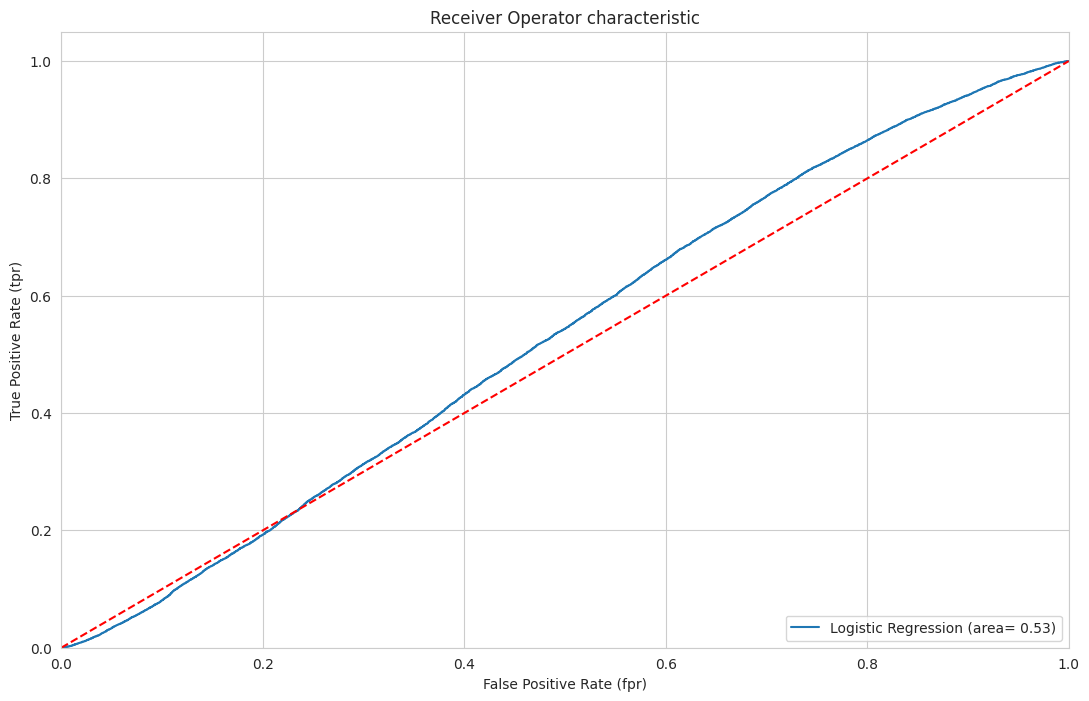

In [ ]:
# Plot ROC_AUC_Curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Predict probabilities for the training set
train_pred_prob = log_reg.predict_proba(X_train)[:, 1]

In [ ]:
# Define column names for the DataFrame
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

# Create an empty DataFrame with the specified column names
cutoff_data = pd.DataFrame(columns=column_names)

# Generate a range of cutoff probabilities from 0 to 1 with a step size of 0.01
Cutoff_Prob = np.arange(0, 1.01, 0.01)

# Iterate over each cutoff probability
for cutoff in Cutoff_Prob:
    # Predict binary labels based on the probability cutoff
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")

    # Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), False Positives (FP)
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 0)).sum()

    # Calculate total Positive (P) and Negative (N) instances
    P = TP + FN
    N = TN + FP

    # Create a dictionary with the calculated values
    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    # Append the dictionary as a new row to the cutoff_data DataFrame
    #cutoff_data = cutoff_data.append(temp_data, ignore_index=True)
    cutoff_data.loc[len(cutoff_data)] = temp_data

# Dropping the pred_y column from y_train data to avoid conflicts
y_train.drop("pred_y", axis=1, inplace=True)


In [ ]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])*2 + (1-cutoff_data["Sp"])**2)* 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])


<font color='Red'><b>We will be calculating the following cutoffs:</b></font>

1. <b>dist_cutoff:</b> Finds the cutoff probability value based on the minimum distance calculated in the cutoff_data DataFrame. It selects the row with the smallest distance and retrieves the corresponding cutoff probability value.

2. <b>ks_cutoff:</b> Determines the cutoff probability value based on the maximum Kolmogorov-Smirnov (KS) statistic calculated in the cutoff_data DataFrame. It selects the row with the largest KS statistic and retrieves the corresponding cutoff probability value.

3. <b>f1_cutoff:</b> Calculates the cutoff probability value based on the maximum F1 score calculated in the cutoff_data DataFrame. It selects the row with the highest F1 score and retrieves the corresponding cutoff probability value.


In [ ]:
# Cutoff probability value based on minimum distance
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data["Dist"]), "Cutoff_Prob"]

# Cutoff probability value based on maximum Kolmogorov-Smirnov (KS) statistic
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]

# Cutoff probability value based on maximum F1 score
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]


In [ ]:
print("The dist cutoff determined is:", dist_cutoff)
print("The KS cutoff determined is:", ks_cutoff)
print("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.54
The KS cutoff determined is: 0.55
The f1 cutoff determined is: 0.5


In [ ]:
# List of cutoff values
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (log_reg.predict_proba(X_train)[:,1] > cutoff).astype(int)
    y_pred_test = (log_reg.predict_proba(X_test)[:,1] > cutoff).astype(int)

    # Print results using the current cutoff value
    print("Using the cutoff value as:", cutoff)
    print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
    print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
    print("Recall on train data:", recall_score(y_train, y_pred_train))
    print("Recall on test data:", recall_score(y_test, y_pred_test))
    print("Precision on train data:", precision_score(y_train, y_pred_train))
    print("Precision on test data:", precision_score(y_test, y_pred_test))
    print("f1 score on train data:", f1_score(y_train, y_pred_train))
    print("f1 score on test data:", f1_score(y_test, y_pred_test))
    print("\n")


Using the cutoff value as: 0.54
Accuracy on train data: 0.5726746064221566
Accuracy on test data: 0.57776629194125
Recall on train data: 0.8673327649464982
Recall on test data: 0.869325945043267
Precision on train data: 0.5801651939330638
Precision on test data: 0.586285451008498
f1 score on train data: 0.6952635458901585
f1 score on test data: 0.7002873914638621


Using the cutoff value as: 0.55
Accuracy on train data: 0.5598066030624771
Accuracy on test data: 0.5613559030021105
Recall on train data: 0.7436319918765387
Recall on test data: 0.7441551540913921
Precision on train data: 0.5853207965435859
Precision on test data: 0.5899681049527592
f1 score on train data: 0.6550470018395693
f1 score on test data: 0.6581517908093047


Using the cutoff value as: 0.5
Accuracy on train data: 0.5657291150690242
Accuracy on test data: 0.5711547572899168
Recall on train data: 0.996005326231691
Recall on test data: 0.9952937604372248
Precision on train data: 0.5644118493265947
Precision on test da

In [ ]:
default=0.5 # default cutoff

In [ ]:
# Define the cutoff values
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

# Initialize an empty list to store results
results = []

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (log_reg.predict_proba(X_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (log_reg.predict_proba(X_test)[:, 1] > cutoff).astype(int)

    # Calculate evaluation metrics for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Store the results in a dictionary
    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_train,
        'Accuracy_test': accuracy_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.565729,0.571155,0.996005,0.995294,0.564412,0.569926,0.720522,0.724810
1,0.54,0.572675,0.577766,0.867333,0.869326,0.580165,0.586285,0.695264,0.700287
2,0.55,0.559807,0.561356,0.743632,0.744155,0.585321,0.589968,0.655047,0.658152
3,0.50,0.565729,0.571155,0.996005,0.995294,0.564412,0.569926,0.720522,0.724810


**DecisionTreeClassifier**

In [ ]:
# Import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)  # Calculate accuracy for the training set
precision_train = precision_score(y_train, y_train_pred)  # Calculate precision for the training set
recall_train = recall_score(y_train, y_train_pred)  # Calculate recall for the training set
f1_train = f1_score(y_train, y_train_pred)  # Calculate F1 score for the training set

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)  # Calculate accuracy for the test set
precision_test = precision_score(y_test, y_test_pred)  # Calculate precision for the test set
recall_test = recall_score(y_test, y_test_pred)  # Calculate recall for the test set
f1_test = f1_score(y_test, y_test_pred)  # Calculate F1 score for the test set

# Print evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Metrics:
Accuracy: 0.9572080802859974
Precision: 0.9561130874368096
Recall: 0.9690678609382116
F1 Score: 0.962546887075189


**Dealing with overfitting **

In [ ]:

# Define the hyperparameters and their ranges for tuning
parameters = {
    "max_depth": np.arange(1, 10),  # Maximum depth of the decision tree
    "criterion": ["gini", "entropy"],  # Criteria to measure the quality of a split
    "splitter": ["best", "random"],  # Strategy to choose the split at each node
    "min_samples_split": np.arange(2, 20),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    "max_features": ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(dt_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_dt_classifier = random_search.best_estimator_

# Make predictions on the training and test data using the best estimator
y_train_pred = best_dt_classifier.predict(X_train)
y_test_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the best parameters found by the randomized search
print("Best Parameters:", random_search.best_params_)

# Print the evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print the evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini'}
Training Metrics:
Accuracy: 0.8046324812094846
Precision: 0.8860845606993435
Recall: 0.748642098305377
F1 Score: 0.8115854735027468

Test Metrics:
Accuracy: 0.8024723263126158
Precision: 0.8876150929770716
Recall: 0.7463944132381964
F1 Score: 0.8109021936335147


**RandomForestClassifier**

In [ ]:
# Import the RandomForestClassifier class from the sklearn.tree module
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_depth': np.arange(1,7),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_rf_classifier.predict(X_train)
y_test_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 5, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 6}
Training Metrics:
Accuracy: 0.8676533930609696
Precision: 0.8669063425219294
Recall: 0.9031890333272663
F1 Score: 0.8846758340488021

Test Metrics:
Accuracy: 0.8650127062066589
Precision: 0.8660226029894277
Recall: 0.9015864581751936
F1 Score: 0.8834467626166835


**Bagging Classifier**

In [ ]:
# Import the BaggingClassifier class from the sklearn.ensemble module
from sklearn.ensemble import BaggingClassifier

# Initialize base estimator (Decision Tree) with limited depth
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1)

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_samples': [0.5, 0.8],  # Maximum number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.8]  # Maximum number of features to consider when looking for the best split
}

# Initialize Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(bagging_classifier, parameters, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_bagging_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_bagging_classifier.predict(X_train)
y_test_pred = best_bagging_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 10, 'max_samples': 0.5, 'max_features': 0.5}
Training Metrics:
Accuracy: 0.8478829711627506
Precision: 0.8401479681189463
Recall: 0.9007270881031526
F1 Score: 0.869383509396454

Test Metrics:
Accuracy: 0.8470086574492829
Precision: 0.8431281648955139
Recall: 0.8973356611507515
F1 Score: 0.8693877551020409


**AdaBoostClassifier**

In [ ]:
# Import the AdaBoostClassifier class from the sklearn.ensemble module
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with hyperparameter tuning parameters
ab_tuned = AdaBoostClassifier(random_state=1)

# Define the grid of parameters to choose from
parameter_grid = {
    'n_estimators': np.arange(5, 40, 2),  # Number of estimators (weak learners) to use
    'learning_rate': [0.5, 0.1, 0.01, 0.001]  # Learning rate shrinks the contribution of each classifier
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(ab_tuned, parameter_grid, scoring='recall', cv=5, n_iter=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_ab_tuned = random_search.best_estimator_

# Make predictions on the training and test data using the best estimator
y_train_pred = best_ab_tuned.predict(X_train)
y_test_pred = best_ab_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the best parameters found by the randomized search
print("Best Parameters:", random_search.best_params_)

# Print the evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print the evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 25, 'learning_rate': 0.1}
Training Metrics:
Accuracy: 0.7846574634419486
Precision: 0.7566951294378403
Recall: 0.9091954133098314
F1 Score: 0.8259651199220246

Test Metrics:
Accuracy: 0.7842313821768532
Precision: 0.7598752267880446
Recall: 0.9060649764688022
F1 Score: 0.8265558729334372


**GradientBoostingClassifier**

In [ ]:
# Import the GradientBoostingClassifier class from the sklearn.ensemble module
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier with hyperparameter tuning parameters
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameter_grid = {
    'n_estimators': [5, 8],  # Set the number of boosting stages to choose from
    'learning_rate': [0.05, 0.1],  # Set the learning rate to choose from
    'max_depth': [3, 4],  # Set the maximum depth of trees to choose from
    'min_samples_split': [2, 3],  # Set the minimum samples required to split to choose from
    'min_samples_leaf': [1, 2]  # Set the minimum samples required at leaf nodes to choose from
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(gb_tuned, parameter_grid, cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best estimator
best_gb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_gb_tuned.predict(X_train)
y_test_pred = best_gb_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the best parameters found by the randomized search
print("Best Parameters:", random_search.best_params_)

# Print evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 8, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
Training Metrics:
Accuracy: 0.8990480907974931
Precision: 0.8895054260322196
Recall: 0.9367462088917414
F1 Score: 0.9125148141581358

Test Metrics:
Accuracy: 0.8998793987164577
Precision: 0.8921175322563157
Recall: 0.9368453013511462
F1 Score: 0.9139345021011904


**XGBoostClassifier**

In [ ]:
# Import the XGBClassifier class from the xgboost module

from xgboost import XGBClassifier

# Initialize XGBoost Classifier with hyperparameter tuning parameters
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from (with reduced values for faster execution)
parameter_grid = {
    'n_estimators': [5,15],  # Number of trees in the ensemble
    'subsample': [0.7, 0.8, 0.09],  # Subsample ratio of the training instances
    'gamma': [0, 1, 3],  # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.7, 0.8, 0.09],  # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': [0.7, 0.8, 0.09]  # Subsample ratio of columns for each level when constructing each tree
}


# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best estimator
best_xgb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_xgb_tuned.predict(X_train)
y_test_pred = best_xgb_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'subsample': 0.09, 'n_estimators': 15, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.09}
Training Metrics:
Accuracy: 0.9096440031873883
Precision: 0.9119309365507773
Recall: 0.928948452423148
F1 Score: 0.9203610375558784

Test Metrics:
Accuracy: 0.9094198216823879
Precision: 0.9134672841350463
Recall: 0.928305753757401
F1 Score: 0.9208267449740231


In [ ]:
# Get feature importances
feature_importances = best_xgb_tuned.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance:")
print(importance_df)


Feature Importance:
              Feature  Importance
7       ConnectionOrg    0.237271
10               V6CF    0.104605
20  TransactionMinute    0.075837
1                V1CF    0.075426
11            channel    0.065873
13  webSessWebBrowser    0.048565
14        IsOldDevice    0.046756
18  TranscactionMonth    0.046036
12          webSessOS    0.044773
3                V3CF    0.029638
8      ConnectionType    0.028225
4                V4CF    0.027131
16     TransactionDay    0.026901
6            AreaCode    0.023167
9     ConnectionSpeed    0.020084
2                V2CF    0.017449
21  TransactionSecond    0.016834
15      MainEntityUse    0.016596
22   AddressTransDiff    0.015000
0             Country    0.013574
19    TransactionHour    0.011532
23           timediff    0.005942
5                V5CF    0.002785
17   Transcactionyear    0.000000


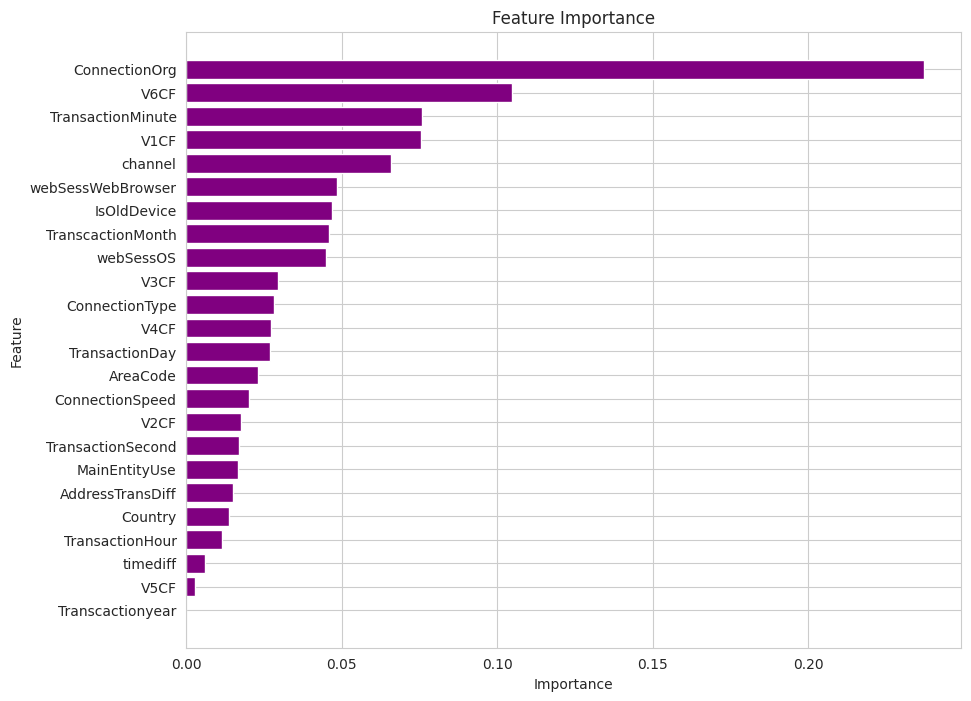

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='Purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


<font color='Red'><b>Significant Predictors:</b></font>

- <b>'ConnectionOrg', 'TransactionMinute', 'TransactionMonth', 'V6CF', 'IsOldDevice', 'channel', 'webSessWebBrowser', 'V1CF'</b> emerged as the top five most important features for predicting fraudulent transactions, with importance values ranging from 0.183983 to 0.063834.

<font color='Red'><b>Less Pronounced Factors:</b></font>

- Other features such as <b> 'ConnectionType', 'webSessOS', 'V2CF','V3CF','V4CF'</b> and <b>'V5CF'</b> also contributed to fraud prediction, albeit with relatively lower importance values.


In [ ]:
# Define the data for each classifier
data = {
    "Classifier": ["Logistic Regression", "Decision Tree", "Decision Tree (Pre-Pruning)", "Random Forest",
                   "Bagging Classifier", "AdaBoost Classifier", "Gradient Boost Classifier", "XGBoost Classifier"],
    "Accuracy Train": [0.5718, 1.0, 0.8236, 0.8740, 0.8385, 0.8386, 0.8897, 0.9061],
    "Accuracy Test": [0.5763, 0.9588, 0.8227, 0.8756, 0.8379, 0.8401, 0.8894, 0.9043],
    "Precision Train": [0.5694, 1.0, 0.8842, 0.8544, 0.8211, 0.8287, 0.8911, 0.9064],
    "Precision Test": [0.5739, 0.9580, 0.8872, 0.8570, 0.8226, 0.8313, 0.8908, 0.9046],
    "Recall Train": [0.9780, 1.0, 0.7896, 0.9354, 0.9114, 0.8991, 0.9374, 0.9352],
    "Recall Test": [0.9796, 0.9699, 0.7872, 0.9363, 0.9096, 0.8999, 0.9374, 0.9358],
    "F1 Score Train": [0.7197, 1.0, 0.8342, 0.8931, 0.8639, 0.8624, 0.9053, 0.9181],
    "F1 Score Test": [0.7237, 0.9639, 0.8342, 0.8949, 0.8639, 0.8642, 0.9055, 0.9170]
}

# Create DataFrame
df_summary= pd.DataFrame(data)


# Display the DataFrame
df_summary

,Classifier,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,Logistic Regression,0.5718,0.5763,0.5694,0.5739,0.9780,0.9796,0.7197,0.7237
1,Decision Tree,1.0000,0.9588,1.0000,0.9580,1.0000,0.9699,1.0000,0.9639
2,Decision Tree (Pre-Pruning),0.8236,0.8227,0.8842,0.8872,0.7896,0.7872,0.8342,0.8342
3,Random Forest,0.8740,0.8756,0.8544,0.8570,0.9354,0.9363,0.8931,0.8949
4,Bagging Classifier,0.8385,0.8379,0.8211,0.8226,0.9114,0.9096,0.8639,0.8639
5,AdaBoost Classifier,0.8386,0.8401,0.8287,0.8313,0.8991,0.8999,0.8624,0.8642
6,Gradient Boost Classifier,0.8897,0.8894,0.8911,0.8908,0.9374,0.9374,0.9053,0.9055
7,XGBoost Classifier,0.9061,0.9043,0.9064,0.9046,0.9352,0.9358,0.9181,0.9170


 *  XGBoost Classifier emerges as the top-performing algorithm among all of
 them.   

*  It have achieved high Accuracy,Precision,Recall and F1 Score on both Training and Test Dataset.


*  Overall able to control Overfitting and caputring the Underlying pattern

**Therefore, XGBoost is recommended as the algorithm of choice for the given task.**


# **Business Insights:-**


<font color='Red'><b>Temporal Patterns:</b></font>
- The transaction month emerges as a crucial indicator, suggesting temporal patterns in fraudulent activity. This insight enables us to implement targeted monitoring strategies during peak periods of fraudulent activity.

<font color='Red'><b>Behavioral Characteristics:</b></font>
- Features like 'IsOldDevice' and 'webSessWebBrowser' provide valuable insights into the behavioral characteristics associated with fraudsters. Understanding these patterns allows us to develop more sophisticated fraud detection algorithms.

<font color='Red'><b>Transaction Details:</b></font>
- Transaction-specific attributes such as 'V6CF' and 'V1CF' play a critical role in predicting fraudulent transactions. Analyzing these details enables us to identify suspicious patterns and anomalies more effectively.


<font color='Red'><b>Out of Sample Testing:</b></font>

In out-of-sample evaluation, the model's performance is assessed on data that it hasn't seen during training. This ensures that the evaluation reflects how well the model generalizes to new, unseen data, providing a more accurate estimate of its performance in real-world scenarios.


In [ ]:
# Initialize XGBoost Classifier with hyperparameter tuning parameters
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from (with reduced values for faster execution)
parameter_grid = {
    'n_estimators': [5,15],  # Number of trees in the ensemble
    'subsample': [0.7, 0.8, 0.09],  # Subsample ratio of the training instances
    'gamma': [0, 1, 3],  # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.7, 0.8, 0.09],  # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': [0.7, 0.8, 0.09]  # Subsample ratio of columns for each level when constructing each tree
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X, y)  # Using the entire dataset

# Get the best estimator
best_xgb_tuned = random_search.best_estimator_

# Make predictions on the entire dataset
y_pred = best_xgb_tuned.predict(X)

# Calculate evaluation metrics for the entire dataset
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameters: {'subsample': 0.09, 'n_estimators': 15, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.09}
Evaluation Metrics:
Accuracy: 0.9081140445324949
Precision: 0.908405459645491
Recall: 0.9379619003901767
F1 Score: 0.9199548280351321


 <b>The performance on the Out of Sample Testing  is consistent with that of the training and test datasets, indicating that the model generalizes well to unseen data.<b>